<a href="https://colab.research.google.com/github/cherlimSG/ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

#Load mtcars dataset

Download the data file from Polymall and upload it here!



Run the following cells to load the data.

In [ ]:
url = 'https://raw.githubusercontent.com/cherlim/NP/main/mtcars.csv'
#car_dataset = pd.read_csv('mtcars.csv')
car_dataset = pd.read_csv(url)


# Print a few rows of crime_dataset
print(car_dataset.head())

# Print all column names/ feature names
print(car_dataset.columns)

# Target is the 'mpg' column

               model   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0          Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1      Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2         Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3     Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4  Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2

[5 rows x 12 columns]
Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


In [ ]:
# Display average values of columns of the dataset
# Why? Feature normalization later!

car_dataset.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

We will take all columns after 'mpg' as features.

In [ ]:
X_car =  car_dataset.iloc[:, 2:12]
y_car = car_dataset['mpg']

In [ ]:
# Print type and size of X_car
print(type(X_car), X_car.shape)

# Print type and size of y_car
print(type(y_car), y_car.shape)

<class 'pandas.core.frame.DataFrame'> (32, 10)
<class 'pandas.core.series.Series'> (32,)


#Split data into Train / Validation / Test sets. (10 marks)

In [ ]:
# Your code
#X_train_val, X_test, y_train_val, y_test = ....................................................
X_train_val, X_test, y_train_val, y_test = train_test_split(X_car, y_car, test_size = 0.1, random_state = 0)

#X_train, X_val, y_train, y_val = ....................................................
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 0)



#Lasso model: searching for the best $\alpha$. (45 marks)

###Activity 1(a): Write a function called `get_mse_Lasso`

Inputs:

- `X_train`, `y_train`, `X_val`, `y_val`, and
- `alpha`

Ouput:
- `train_mse`: $\text{MSE}$ on the training set
-`val_mse`: $\text{MSE}$ on the validation set

Note: We need to scale the training set and the validation set.

In [ ]:
# Scale the training set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

# Transform the validation set
X_val_MinMax = my_scaler.transform(X_val)
#X_test_MinMax = my_scaler.transform(X_test)

In [ ]:
# Your code

def get_mse_Lasso(alphas):

  # Create a Lasso regression model and train it
  my_LR_Lasso_02 = Lasso(alpha=alphas)
  my_LR_Lasso_02.fit(X_train_MinMax, y_train)

  # determine MSE on training set
  y_train_predict = my_LR_Lasso_02.predict(X_train_MinMax)
  train_mse = mean_squared_error(y_train, y_train_predict)

  # determine MSE on testing set
  y_val_predict = my_LR_Lasso_02.predict(X_val_MinMax)
  val_mse = mean_squared_error(y_val, y_val_predict)
  

  return train_mse, val_mse 

###Activity 3(a): Plot `train_mse_array_Lasso` and `val_mse_array_Lasso`. Choose the best `alpha`.

In [ ]:
# Your code
train_mse_array_Lasso = []
val_mse_array_Lasso = []

alpha_array = np.linspace(0.000001,10,1000,dtype=float)

for i in alpha_array:

  temp = get_mse_Lasso(i)

  train_mse_array_Lasso.append(temp[0])

  val_mse_array_Lasso.append(temp[1])


###Activity 3(a): Plot `train_mse_array` and `val_mse_array`. Choose the best `alpha`.

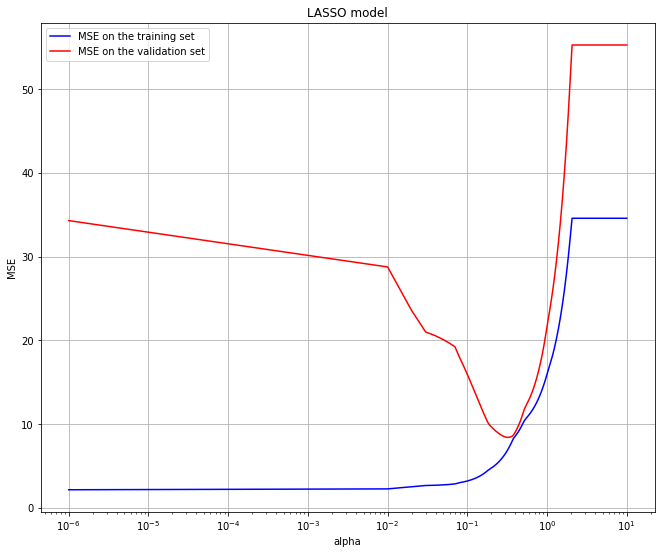

In [ ]:
plt.figure(figsize = (11, 9))

plt.semilogx(alpha_array, train_mse_array_Lasso, color = 'blue', label = "MSE on the training set")
plt.semilogx(alpha_array, val_mse_array_Lasso, color = 'red', label = "MSE on the validation set")

plt.legend() # to show legends
plt.title("LASSO model")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.grid()
plt.show()

## What is your choosen $\alpha$ for the final LASSO model?
# Answer: 0.37

##Final LASSO model

Write codes to complete the following tasks:

- Use the training set and validation set as the training set for the final model.

- Scale the new training set.

- Create and train the final model.

- Scale the test set.

- Calculate and print out $\text{MSE}$ and $\text{RMSE}$ when using the final model to test on the test set.

In [ ]:
# Your code

# Scale the training/validation set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

# Transform the test set
X_test_MinMax = my_scaler.transform(X_test)

# Create a Lasso model and train it
my_LR_Lasso_03 = Lasso(alpha=0.37)
my_LR_Lasso_03.fit(X_train_MinMax, y_train)

# determine MSE, RMSE on testing set
y_test_predict = my_LR_Lasso_03.predict(X_test_MinMax)

#MSE_test_Lasso = mean_squared_error(y_test, y_test_predict)
MSE_test_Lasso = mean_squared_error(y_test, y_test_predict)
RMSE_test_Lasso = np.sqrt(MSE_test_Lasso)

print("MSE (Final): {:.3f}".format(MSE_test_Lasso))
print("RMSE (Final): {:.3f}".format(RMSE_test_Lasso))


MSE (Final): 4.894
RMSE (Final): 2.212


# Extra activity: Combine Validation and Test sets for final testing
Due to the small dataset (only 32 samples), final testing is carried out by combining both validation and test sets.


In [ ]:
# Your code

# Scale the training/validation set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

#Experiment with a bigger test set by appending both X_test and X_val
X_test_new = X_test.append(X_val)
y_test_new = y_test.append(y_val)

# Transform the test set
#X_test_MinMax = my_scaler.transform(X_test)
X_test_new_MinMax = my_scaler.transform(X_test_new)

# Create a Lasso model and train it
my_LR_Lasso_03 = Lasso(alpha=0.37)
my_LR_Lasso_03.fit(X_train_MinMax, y_train)

# determine MSE, RMSE on testing set
y_test_new_predict = my_LR_Lasso_03.predict(X_test_new_MinMax)

#MSE_test_Lasso = mean_squared_error(y_test, y_test_predict)
MSE_test_new_Lasso = mean_squared_error(y_test_new, y_test_new_predict)
RMSE_test_new_Lasso = np.sqrt(MSE_test_new_Lasso)

print("MSE (Final): {:.3f}".format(MSE_test_new_Lasso))
print("RMSE (Final): {:.3f}".format(RMSE_test_new_Lasso))

MSE (Final): 6.792
RMSE (Final): 2.606


In [ ]:
print(y_test_new_predict)

[15.6983243  16.25818604 20.72928276 26.64943761 14.57419247 14.65795132
 17.64445327 26.11269154 25.36897103 15.95400919 17.64445327 27.36094693
 26.24386848 27.27101639 15.95400919 26.98888134]


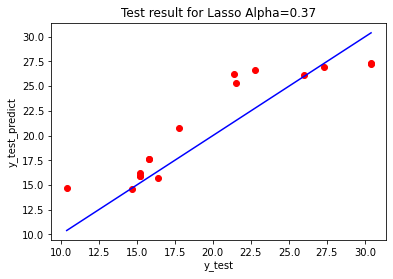

In [ ]:
plt.scatter(y_test_new, y_test_new_predict, color = "red")
p1 = max(max(y_test_new_predict), max(y_test_new))
p2 = min(min(y_test_new_predict), min(y_test_new))
plt.plot([p1, p2], [p1, p2], color = 'blue')
plt.title("Test result for Lasso Alpha=0.37")
plt.xlabel("y_test")
plt.ylabel("y_test_predict")
plt.show()

#Ridge Regression: searching for the best $\alpha$. (45 marks)

###Activity 1(b): Write a function called `get_mse_Ridge`

Inputs:

- `X_train`, `y_train`, `X_val`, `y_val`, and
- `alpha`

Ouput:
- `train_mse`: $\text{MSE}$ on the training set
-`val_mse`: $\text{MSE}$ on the validation set

Note: We need to scale the training set and the validation set.

In [ ]:
# Scale the training set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

# Transform the validation set
X_val_MinMax = my_scaler.transform(X_val)


In [ ]:
# Your code

def get_mse_Ridge(alpha):

  # Create a Ridge regression model and train it
  my_LR_Ridge_02 = Ridge(alpha=alpha)
  my_LR_Ridge_02.fit(X_train_MinMax, y_train)

  # determine MSE on training set
  y_predict_train = my_LR_Ridge_02.predict(X_train_MinMax)
  train_mse = mean_squared_error(y_train, y_predict_train)

  # determine MSE on testing set
  y_predict_val = my_LR_Ridge_02.predict(X_val_MinMax)
  val_mse = mean_squared_error(y_val, y_predict_val)
  

  return train_mse, val_mse 

###Activity 2(b): Use `get_mse_Ridge()` to get `train_mse` and `val_mse` for an array of `alpha`.

In [ ]:
# Your code

train_mse_array_Ridge = []
val_mse_array_Ridge = []

alpha_array = np.linspace(0.000001,50,1000,dtype=float)

for alpha in alpha_array:

  temp = get_mse_Ridge(alpha)

  train_mse_array_Ridge.append(temp[0])

  val_mse_array_Ridge.append(temp[1])


###Activity 3(b): Plot `train_mse_array_Ridge` and `val_mse_array_Ridge`. Choose the best `alpha`.

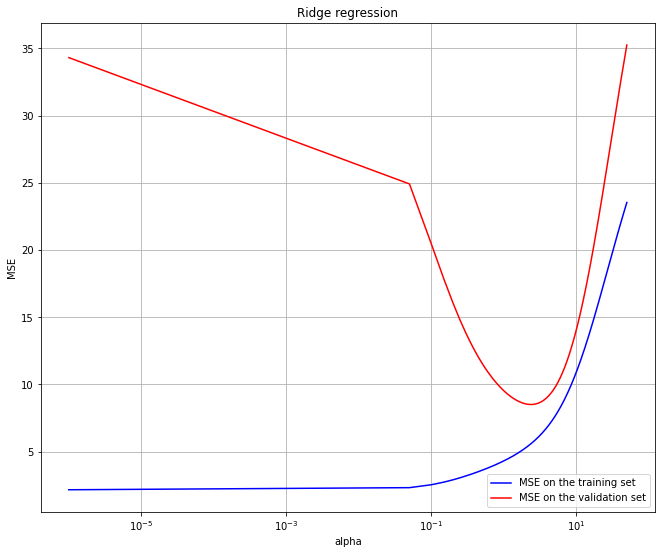

In [ ]:
# Your code

plt.figure(figsize = (11, 9))

plt.semilogx(alpha_array, train_mse_array_Ridge, color = 'blue', label = "MSE on the training set")
plt.semilogx(alpha_array, val_mse_array_Ridge, color = 'red', label = "MSE on the validation set")

plt.legend() # to show legends
plt.title("Ridge regression")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.grid()
plt.show()

## What is your choosen $\alpha$ for the final Ridge regression model?
# Answer: 2

##Final Ridge regression model

Write codes to complete the following tasks:

- Use the training set and validation set as the training set for the final model.

- Scale the new training set.

- Create and train the final model.

- Scale the test set.

- Calculate and print out $\text{MSE}$ and $\text{RMSE}$ when using the final model to test on the test set.

In [ ]:
# Your code

# Scale the training set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

# Transform the test set
X_test_MinMax = my_scaler.transform(X_test)

# Create a Ridge regression model and train it
my_LR_Ridge_03 = Ridge(alpha=2)
my_LR_Ridge_03.fit(X_test_MinMax, y_test)

# determine MSE on test set
y_predict_test = my_LR_Ridge_03.predict(X_test_MinMax)
MSE_test_Ridge = mean_squared_error(y_test, y_predict_test)
RMSE_test_Ridge = np.sqrt(MSE_test_Ridge)

print("MSE (Final): {:.3f}".format(MSE_test_Ridge))
print("RMSE (Final): {:.3f}".format(RMSE_test_Ridge))


MSE (Final): 2.040
RMSE (Final): 1.428


# Extra activity: Combine validation and test sets for final testing
Due to the small dataset size (only 32 samples), a final testing is used by combining both validation and test sets.

In [ ]:
#Validate combining the validation and test sets
# Your code

# Scale the training set
my_scaler = MinMaxScaler()
X_train_MinMax = my_scaler.fit_transform(X_train)

# Transform the test set
X_test_new_MinMax = my_scaler.transform(X_test_new)

# Create a Ridge regression model and train it
my_LR_Ridge_03 = Ridge(alpha=2)
my_LR_Ridge_03.fit(X_test_new_MinMax, y_test_new)

# determine MSE on test set
y_predict_test_new = my_LR_Ridge_03.predict(X_test_new_MinMax)
MSE_test_Ridge_new = mean_squared_error(y_test_new, y_predict_test_new)
RMSE_test_Ridge_new = np.sqrt(MSE_test_Ridge)

print("MSE (Final): {:.3f}".format(MSE_test_Ridge_new))
print("RMSE (Final): {:.3f}".format(RMSE_test_Ridge_new))

MSE (Final): 5.410
RMSE (Final): 2.326


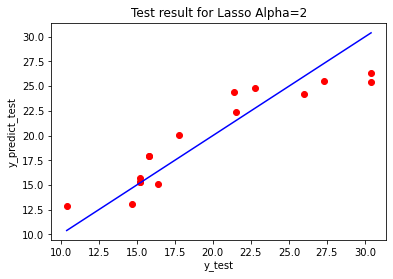

In [ ]:
plt.scatter(y_test_new, y_predict_test_new, color = "red")
p1 = max(max(y_predict_test_new), max(y_test_new))
p2 = min(min(y_predict_test_new), min(y_test_new))
plt.plot([p1, p2], [p1, p2], color = 'blue')
plt.title("Test result for Lasso Alpha=2")
plt.xlabel("y_test")
plt.ylabel("y_predict_test")
plt.show()

# Linear Regression model (optional)

Write codes to complete the following tasks:

- Use the training set and validation set as the training set for the linear regression model.

- Scale the new training set.

- Create and train the final model.

- Scale the test set.

- Calculate and print out $\text{MSE}$ and $\text{RMSE}$ when using the final model to test on the test set.

In [ ]:
# Your code
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.3, random_state = 0)

my_LR = LinearRegression()
my_LR.fit(X_train, y_train)


print("Result of Linear Regression:\n")
print("Intercept = {}\n".format(my_LR.intercept_))
print("Coefficients = {}\n".format(my_LR.coef_))


Result of Linear Regression:

Intercept = -23.064221000604913

Coefficients = [ 1.87348075  0.01152686 -0.01312608  3.44043172 -3.24293367  0.86017616
  0.44103927  1.51229472  5.26551409 -2.13861236]



In [ ]:
y_predict_test = my_LR.predict(X_test)

MSE_test = mean_squared_error(y_test, y_predict_test)
RMSE_test = np.sqrt(MSE_test)

R2_score_test = my_LR.score(X_test, y_test)


print("MSE on the test set: {:.3f}".format(MSE_test))
print("RMSE on the test set: {:.3f}".format(RMSE_test))
print("R2 score on the test set: {:.3f}".format(R2_score_test))

MSE on the test set: 25.435
RMSE on the test set: 5.043
R2 score on the test set: -0.344
